# Research of advertisements for the sale of apartments

At your disposal is an archive of advertisements for the sale of apartments in St. Petersburg and neighboring settlements for several years. It is necessary to determine the market value of real estate. Your job is to set the parameters. This will allow you to build an automated system: it will track anomalies and fraudulent activity.

For each apartment for sale, two types of data are available. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, airport, nearest park and pond.

# 1.Import data

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

Let's save the file and look at it - what the table looks like and what it consists of

In [2]:
data = pd.read_csv('real_estate_data .csv', sep = '\t')


In [3]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Let's build a histogram for all numeric columns of the table

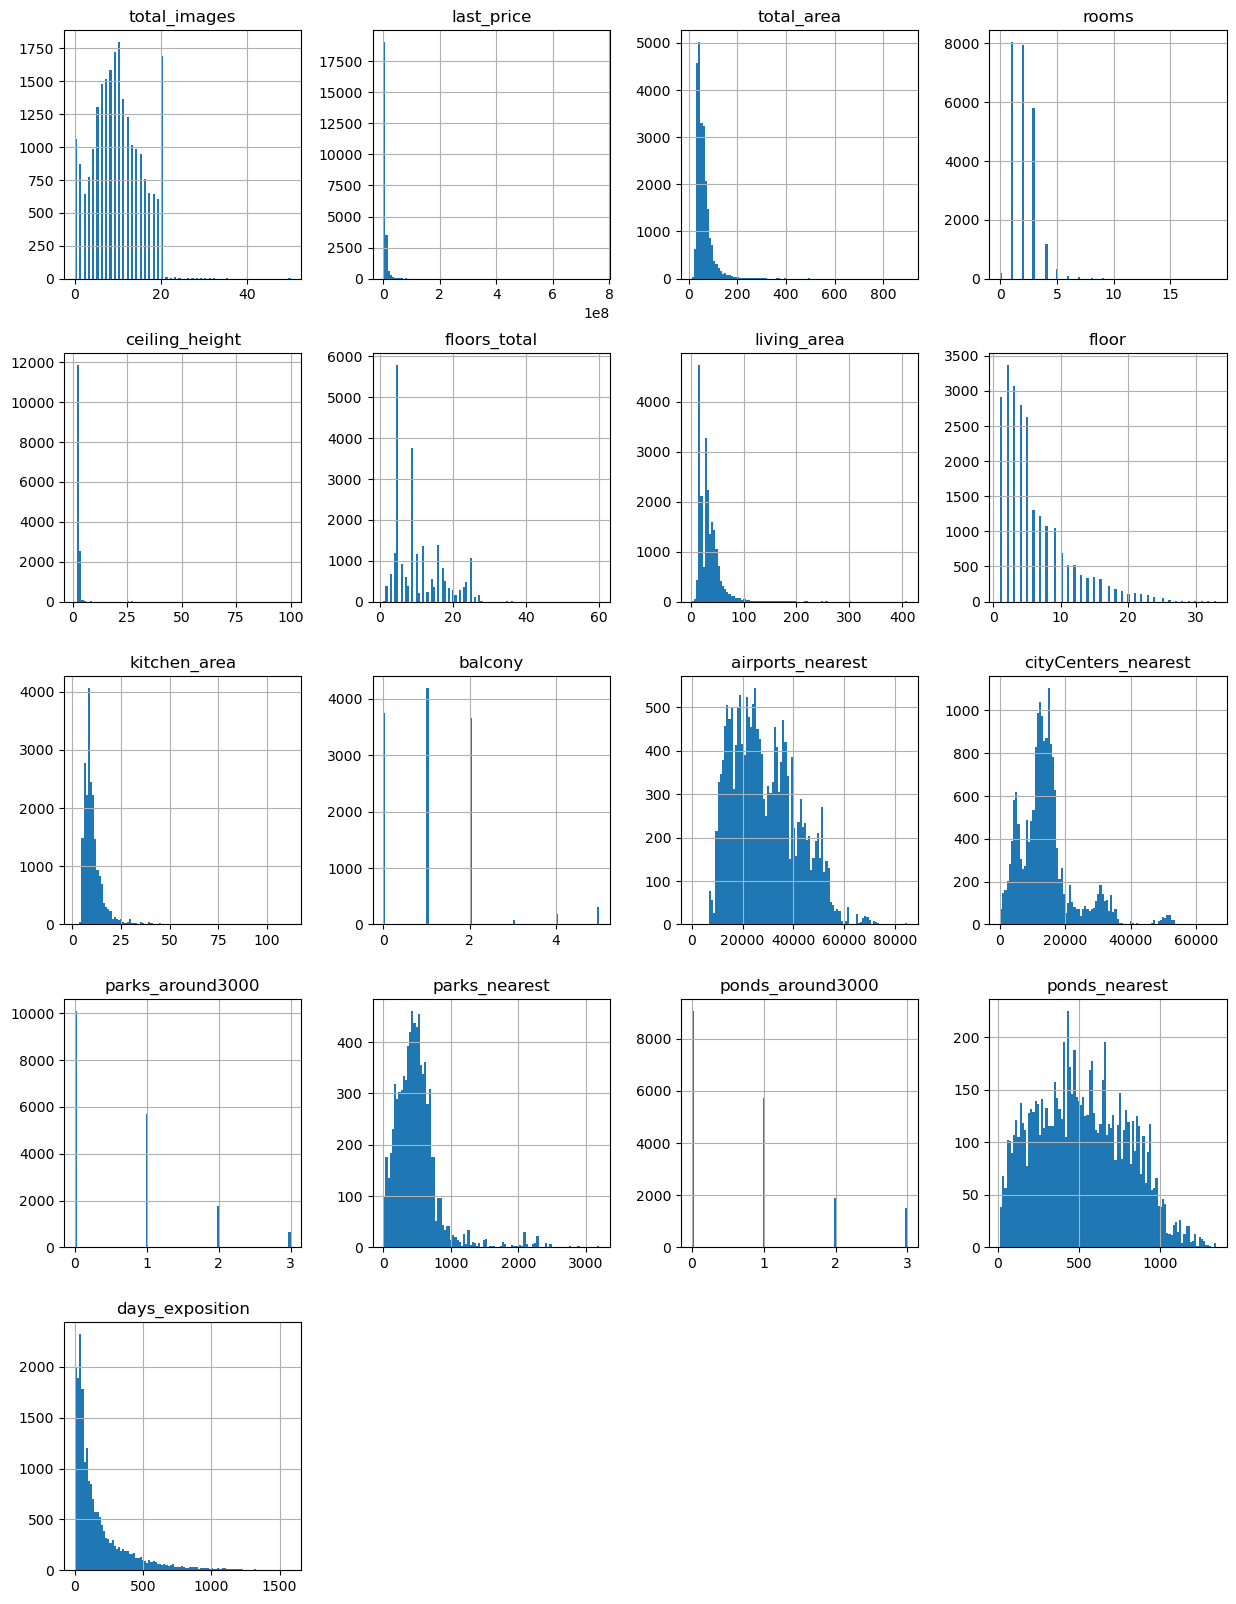

In [6]:
data.hist(figsize=(15,20),bins=100)
plt.show()

Based on the preliminary data graphs, we can say that there are abnormally high values ​​in many columns, as well as gaps. Because business, most likely, is interested in the formula for success, i.e. What most influences a buyer’s decision to buy an apartment, it is best to discard large values. Because Most likely, it is more profitable to quickly sell 100 small apartments for 5 million than to sell 1 large apartment for 300 million in a long time. Plus, most likely, the relationships found during the analysis of small apartments will also affect the sale of large apartments.

# 2 Data preprocessing

Let's see which columns have gaps and general information about the dataframe

In [7]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


There are missing values in 14 out of 22 columns. The most missing values are in the columns is_apartment (!), parks_nearest, ponds_nearest, balcony.
The columns airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 have approximately the same number of gaps, and in general the number of gaps in the cartographic data is large, one can suspect a technical error when uploading the data.
We will take turns going through the columns and assessing the nature of the gaps and how to fill them

replace the zero values ​​in the column with ceiling heights

In [9]:
data[data['ceiling_height'].isna()].head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


In [10]:
data['ceiling_height'].isna().sum()

9195

More like a human factor, they simply forgot to enter the data, but an error during data transfer cannot be ruled out. Since the height of the ceilings is a universal plus or minus value, the gaps can be filled in with the median or average value of the ceilings.
Let's first look at the unique values ​​of this column and their quantities

In [11]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [12]:
data['ceiling_height'].value_counts()

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

In [13]:
#let's evaluate all flow values greater than 4
data['ceiling_height'].loc[data['ceiling_height']>=4].value_counts()

4.00      39
4.20      10
27.00      8
25.00      7
4.50       7
4.40       3
8.00       3
4.10       3
5.30       2
4.45       2
4.70       2
4.19       2
32.00      2
4.14       1
4.25       1
20.00      1
4.15       1
6.00       1
4.65       1
22.60      1
5.80       1
27.50      1
4.90       1
10.30      1
14.00      1
24.00      1
4.30       1
5.50       1
8.30       1
26.00      1
4.37       1
4.80       1
5.60       1
4.06       1
5.00       1
5.20       1
100.00     1
Name: ceiling_height, dtype: int64

most of them fit from 2.5 to 4.0 m. There are large values, but they are isolated and most likely are errors. Let's evaluate them right away. Let's display all lines whose ceiling height values ​​are greater than 4.2

In [14]:
data.loc[data['ceiling_height']>4.2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.00,3.0,NaN,1,False,...,NaN,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1300,14,120000000.0,280.0,2018-07-12T00:00:00,5,4.70,4.0,162.0,3,NaN,...,30.0,NaN,Санкт-Петербург,24680.0,4247.0,1.0,464.0,3.0,339.0,225.0
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.60,6.0,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
2802,7,14950000.0,50.0,2016-03-06T00:00:00,2,4.80,3.0,30.0,2,NaN,...,10.0,0.0,Санкт-Петербург,24433.0,1725.0,1.0,589.0,3.0,161.0,160.0
2823,8,2700000.0,39.0,2018-02-01T00:00:00,1,4.50,6.0,18.3,6,NaN,...,8.4,NaN,посёлок городского типа Токсово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3067,13,6600000.0,95.0,2018-09-08T00:00:00,2,4.50,7.0,45.0,7,True,...,25.0,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.00,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ceiling values ​​above 20 are an error that can be corrected by dividing the values ​​by 10.значения потолков выше 20 - ошибка, которую можно исправить, разделив значения на 10.

In [15]:
data.ceiling_height = data.ceiling_height.replace([27.,22.6,24.,25,27.5,26.,32.,20.0],[2.7,2.6,2.4,2.5,2.75,2.6,3.2, 2.0])

print(data.ceiling_height.unique())


[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76   2.58
   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74
   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82   3.54
   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9    3.18
   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83   3.52
   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19   3.24
   4.8    4.5    4.2    3.36   3.08   3.68   3.07   3.37   3.09   8.
   3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68   3.22   3.27
   4.1    2.93   3.46   3.47   3.33   3.63   3.32   1.2    8.3    2.98
   2.86   3.17   4.4    3.28   3.04   4.45   5.5    3.84   3.23   3.02
   3.21  

We will also correct abnormally low ceiling size values ​​(those below 2)

In [16]:
data.loc[data['ceiling_height']<2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


There are only 3 values, and it looks like this is an error. Let's replace 1.2 and 1.75 with 2.2 and 2.75, respectively. But with the value 1, everything is not so clear. Let's replace it with the median value of apartments with a total area of ​​55 and number of rooms 2

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [18]:
data.loc[(data['total_area']==55)&(data['rooms']==2)].groupby(['total_area','rooms'])['ceiling_height'].median()

total_area  rooms
55.0        2        2.67
Name: ceiling_height, dtype: float64

In [19]:
data.ceiling_height =data.ceiling_height.replace([1.20,1.75,1.0],[2.2,2.75,2.65])


In [20]:
data['ceiling_height'].max()

100.0

We will replace the remaining gaps with median flow values corresponding to the same number of rooms and total area

In [21]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.
                                                           groupby(['rooms','total_area'])['ceiling_height'].
                                                           transform('median'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        22728 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [22]:
data['ceiling_height'].isna().sum()


971

There are 971 rows left with missing values ​​for ceiling heights. Apparently, it was impossible to calculate the median using 2 parameters. We will replace the rest with average ceiling heights calculated by the number of rooms

In [23]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.
                                                           groupby(['rooms'])['ceiling_height'].
                                                           transform('median'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23698 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Let's look at rows with ceilings of more than 6 m. for St. Petersburg, apartments with high ceilings (5 m) are the norm.

In [24]:
data.loc[data['ceiling_height']>6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,NaN,...,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,NaN,...,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
15743,14,5600000.0,67.0,2016-11-11T00:00:00,3,8.0,16.0,41.0,1,NaN,...,8.0,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.0,2,NaN,...,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.3,16.0,15.5,15,NaN,...,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Not many lines. Why are there such values? most likely, where the 14 m ceiling was simply confused with the floor. 100 is clearly some kind of nonsense. But everything else is two-story apartments or a mistake? I think it's better to exclude them.

In [25]:
data = data.loc[data['ceiling_height']<6]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23690 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23690 non-null  int64  
 1   last_price            23690 non-null  float64
 2   total_area            23690 non-null  float64
 3   first_day_exposition  23690 non-null  object 
 4   rooms                 23690 non-null  int64  
 5   ceiling_height        23690 non-null  float64
 6   floors_total          23604 non-null  float64
 7   living_area           21787 non-null  float64
 8   floor                 23690 non-null  int64  
 9   is_apartment          2773 non-null   object 
 10  studio                23690 non-null  bool   
 11  open_plan             23690 non-null  bool   
 12  kitchen_area          21414 non-null  float64
 13  balcony               12176 non-null  float64
 14  locality_name         23641 non-null  object 
 15  airports_nearest   

In [27]:
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


There are no zero values, go to floors_total. Let's estimate the number of gaps

In [28]:
data['floors_total'].isnull().sum()

86

the number of missing values in this column is small - only 86. The error is most likely caused solely by the human factor, however, it is not possible to replace the missing values with any value. Let's delete the rows with missing values in this column.

In [29]:
data.dropna(how='all', subset=['floors_total'], inplace=True)


Let's check the resulting data

In [30]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment            20831
studio                      0
open_plan                   0
kitchen_area             2229
balcony                 11475
locality_name              48
airports_nearest         5531
cityCenters_nearest      5508
parks_around3000         5507
parks_nearest           15563
ponds_around3000         5507
ponds_nearest           14548
days_exposition          3172
dtype: int64

the next column is 'living_area'. Let's evaluate the data in the rows for which the living area parameter is missing

In [31]:
data[data['living_area'].isnull()].head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.85,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.52,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.70,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


Let's estimate, perhaps we can set the median or average total living area depending on the number of rooms. Let's evaluate what values are in the column with the number of rooms and how the data is distributed depending on the number of rooms.

In [32]:
data['rooms'].value_counts()

1     8011
2     7911
3     5794
4     1176
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
15       1
16       1
12       1
Name: rooms, dtype: int64

The majority of apartments have rooms from 1 to 4. An interesting question is how are studios counted - 0 or 1? Most likely, those who put 0 meant studios, but apartments 1 may include studio apartments and one-room apartments with a separate kitchen and room. Let's remember this nuance; we may have to analyze it in the future.
Let's save a table with zero values for living space in a separate variable, save only the necessary columns and, based on them, make a pivot table grouped by the number of apartments.
Let's replace gaps in living space with median data values, grouped by the number of rooms and total area

In [33]:
data['living_area'] =data['living_area'].fillna(data.
                                                groupby(['rooms','total_area'])['living_area'].
                                                transform('median'))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23604 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23604 non-null  int64  
 1   last_price            23604 non-null  float64
 2   total_area            23604 non-null  float64
 3   first_day_exposition  23604 non-null  object 
 4   rooms                 23604 non-null  int64  
 5   ceiling_height        23604 non-null  float64
 6   floors_total          23604 non-null  float64
 7   living_area           23405 non-null  float64
 8   floor                 23604 non-null  int64  
 9   is_apartment          2773 non-null   object 
 10  studio                23604 non-null  bool   
 11  open_plan             23604 non-null  bool   
 12  kitchen_area          21375 non-null  float64
 13  balcony               12129 non-null  float64
 14  locality_name         23556 non-null  object 
 15  airports_nearest   

In [34]:
data[data['living_area'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 360 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          199 non-null    int64  
 1   last_price            199 non-null    float64
 2   total_area            199 non-null    float64
 3   first_day_exposition  199 non-null    object 
 4   rooms                 199 non-null    int64  
 5   ceiling_height        199 non-null    float64
 6   floors_total          199 non-null    float64
 7   living_area           0 non-null      float64
 8   floor                 199 non-null    int64  
 9   is_apartment          13 non-null     object 
 10  studio                199 non-null    bool   
 11  open_plan             199 non-null    bool   
 12  kitchen_area          108 non-null    float64
 13  balcony               75 non-null     float64
 14  locality_name         198 non-null    object 
 15  airports_nearest   

values are missing in 199 lines. since the values of living area are already more variable compared to the height of the ceilings, I think it would be more appropriate to remove values with missing data. Too many missing values

In [35]:
data.dropna(how='all',subset=['living_area'], inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23405 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23405 non-null  int64  
 1   last_price            23405 non-null  float64
 2   total_area            23405 non-null  float64
 3   first_day_exposition  23405 non-null  object 
 4   rooms                 23405 non-null  int64  
 5   ceiling_height        23405 non-null  float64
 6   floors_total          23405 non-null  float64
 7   living_area           23405 non-null  float64
 8   floor                 23405 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23405 non-null  bool   
 11  open_plan             23405 non-null  bool   
 12  kitchen_area          21267 non-null  float64
 13  balcony               12054 non-null  float64
 14  locality_name         23358 non-null  object 
 15  airports_nearest   

handle gaps in is_apartment

In [37]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [38]:
data['is_apartment'].value_counts()

False    2715
True       45
Name: is_apartment, dtype: int64

Google tells us that the percentage of apartments on the market in St. Petersburg and the region is 8% of the total housing stock. From what is occupied, it turns out that there are only 1% of the occupied apartments, but whether the remaining rooms are apartments or not is impossible to say offhand. Of course, it is most likely that most of them are not apartments, but we cannot say for sure, and a replacement would make too many adjustments to the final result. Therefore, we leave it as is.
let's move on to the 'kitchen_area' column. Let's evaluate the data in the rows where data is missing

In [39]:
data[data['kitchen_area'].isnull()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.000,14.0,54.0,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.520,9.0,17.4,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.500,5.0,28.7,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.700,22.0,18.0,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.775,13.0,19.3,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
60,3,2740000.0,35.0,2018-01-01T00:00:00,1,2.600,12.0,17.0,8,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,3.050,10.0,35.0,6,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000.0,80.5,2018-01-15T00:00:00,3,2.725,25.0,47.8,16,NaN,...,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0
133,12,3150000.0,31.0,2018-03-23T00:00:00,1,2.500,25.0,17.0,6,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.0
144,1,2450000.0,27.0,2017-03-30T00:00:00,0,2.700,24.0,15.5,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0


Let's see what the median sq.m. of a kitchen is depending on the rooms

In [40]:
data.groupby('rooms')['kitchen_area'].median()

rooms
0        NaN
1       9.00
2       8.70
3       9.50
4      11.00
5      15.15
6      19.50
7      20.00
8      25.00
9      14.30
10     19.80
11     12.60
12    112.00
14     21.25
15    100.00
16     13.00
Name: kitchen_area, dtype: float64

In [41]:
data.query('rooms == 0').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 144 to 23637
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          192 non-null    int64  
 1   last_price            192 non-null    float64
 2   total_area            192 non-null    float64
 3   first_day_exposition  192 non-null    object 
 4   rooms                 192 non-null    int64  
 5   ceiling_height        192 non-null    float64
 6   floors_total          192 non-null    float64
 7   living_area           192 non-null    float64
 8   floor                 192 non-null    int64  
 9   is_apartment          6 non-null      object 
 10  studio                192 non-null    bool   
 11  open_plan             192 non-null    bool   
 12  kitchen_area          0 non-null      float64
 13  balcony               126 non-null    float64
 14  locality_name         192 non-null    object 
 15  airports_nearest   

It turns out that all apartments with 0 rooms have gaps in kitchen size. It seems that those who filled it out did not know how to indicate the kitchen area. According to publicly available data, in studios the kitchen includes a kitchen-living room, i.e. the same living space. Therefore, for apartments with 0 rooms, the kitchen area can be set to the same as the living area. quote from the Internet: “The living area of a studio is equal to the total (total) area minus the square meters of the bathroom. This means that the kitchen area is also considered residential. This is a paradox.”

In [42]:
#let's collect in a list all the unique values of the number of rooms and write a 
#function that returns the average number of square meters of the kitchen depending on the number of rooms
room_unique = data['rooms'].unique()
def median_kitchen(room):
    kitchen_med=0
    for room_num in room_unique:
        if room == room_num and room == 0:
            kitchen_med=data.loc[data['rooms']==0,'living_area']
            return kitchen_med
        elif room == room_num:
            kitchen_med=data.loc[data['rooms']==room_num]['living_area'].median()
            return kitchen_med
#replace the gaps
for rooms_n in room_unique:
    data.loc[(data['kitchen_area'].isnull()==True)&(data['rooms']==rooms_n),'kitchen_area']= median_kitchen(rooms_n)
print(data[data['kitchen_area'].isnull()])


Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


column balcony. There are most likely gaps where there are no balconies. so let's just replace everything with values 0

In [43]:
data['balcony'].fillna(value=0, inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23405 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23405 non-null  int64  
 1   last_price            23405 non-null  float64
 2   total_area            23405 non-null  float64
 3   first_day_exposition  23405 non-null  object 
 4   rooms                 23405 non-null  int64  
 5   ceiling_height        23405 non-null  float64
 6   floors_total          23405 non-null  float64
 7   living_area           23405 non-null  float64
 8   floor                 23405 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23405 non-null  bool   
 11  open_plan             23405 non-null  bool   
 12  kitchen_area          23405 non-null  float64
 13  balcony               23405 non-null  float64
 14  locality_name         23358 non-null  object 
 15  airports_nearest   

locality_name can’t come up with anything here, you need to delete what has gaps. Moreover, there are few of them

In [44]:
data.dropna(how='all', subset=['locality_name'], inplace=True)

Gaps in cartographic data cannot be logically substituted. This is more of a technical error.
The last thing you can do is delete lines with gaps in the time of sale of apartments

In [45]:
data.dropna(how='all', subset=['days_exposition'], inplace=True)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20220 entries, 1 to 23695
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20220 non-null  int64  
 1   last_price            20220 non-null  float64
 2   total_area            20220 non-null  float64
 3   first_day_exposition  20220 non-null  object 
 4   rooms                 20220 non-null  int64  
 5   ceiling_height        20220 non-null  float64
 6   floors_total          20220 non-null  float64
 7   living_area           20220 non-null  float64
 8   floor                 20220 non-null  int64  
 9   is_apartment          2472 non-null   object 
 10  studio                20220 non-null  bool   
 11  open_plan             20220 non-null  bool   
 12  kitchen_area          20220 non-null  float64
 13  balcony               20220 non-null  float64
 14  locality_name         20220 non-null  object 
 15  airports_nearest   

Columns that require data type changes: last_price, floors_total, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. Here you need to convert float into int to make the information more convenient to read (no need for a floating point). However, we will not be able to change the type in the cartographic data, because... there are gaps. in the first_day_exposition column you need to change the type to date

In [47]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S' )


#let's check what happened
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20220 entries, 1 to 23695
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20220 non-null  int64         
 1   last_price            20220 non-null  int32         
 2   total_area            20220 non-null  float64       
 3   first_day_exposition  20220 non-null  datetime64[ns]
 4   rooms                 20220 non-null  int64         
 5   ceiling_height        20220 non-null  float64       
 6   floors_total          20220 non-null  int32         
 7   living_area           20220 non-null  float64       
 8   floor                 20220 non-null  int64         
 9   is_apartment          2472 non-null   object        
 10  studio                20220 non-null  bool          
 11  open_plan             20220 non-null  bool          
 12  kitchen_area          20220 non-null  float64       
 13  balcony         

Exploring the Title Column

In [48]:
#print all unique values
data.locality_name.unique()         

array(['посёлок Шушары', 'Санкт-Петербург', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Кингисепп', 'Сестрорецк',
       'деревня Куттузи', 'поселок городского типа Ефимовский',
       'посёлок Плодовое', 'деревня Заклинье', 'поселок Торковичи',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой',
       'посёлок Новый Свет', 'Приозерск', 'Сланцы', 'село Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'поселок Новый Свет', 'деревня Оржицы',
       

In [49]:
#let's count the number of all unique data
len(data.locality_name.unique())

329

In [50]:
data.locality_name = data.locality_name.str.replace("посёлок", "поселок")
data.locality_name = data.locality_name.str.replace("городской поселок", "поселок")
data.locality_name = data.locality_name.str.replace("коттеджный поселок", "поселок")
data.locality_name = data.locality_name.str.replace("поселок городского типа", "поселок")
data.locality_name = data.locality_name.str.replace("посёлок при железнодорожной станции", "поселок")


In [51]:
#check the number of unique data. If it decreases, it means everything worked well.
len(data.locality_name.unique())

293

### Working with anomalies.

Let's build boxplots for each column.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20220 entries, 1 to 23695
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20220 non-null  int64         
 1   last_price            20220 non-null  int32         
 2   total_area            20220 non-null  float64       
 3   first_day_exposition  20220 non-null  datetime64[ns]
 4   rooms                 20220 non-null  int64         
 5   ceiling_height        20220 non-null  float64       
 6   floors_total          20220 non-null  int32         
 7   living_area           20220 non-null  float64       
 8   floor                 20220 non-null  int64         
 9   is_apartment          2472 non-null   object        
 10  studio                20220 non-null  bool          
 11  open_plan             20220 non-null  bool          
 12  kitchen_area          20220 non-null  float64       
 13  balcony         

in the first point, when the graphs were plotted, the first anomalies that caught the eye were in the column with the total cost. Let's build a histogram using this table

Text(0, 0.5, 'Frequency')

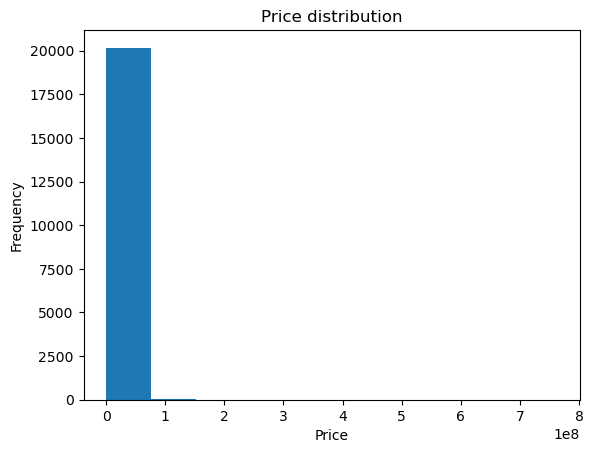

In [53]:
data['last_price'].plot(kind='hist')
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

Let's see how many values ​​there are with a price less than 150 million. Because the histogram shows that the main prices are somewhere below 1.5

In [54]:
price_data=data.loc[data['last_price']<150000000]

Text(0, 0.5, 'Frequency')

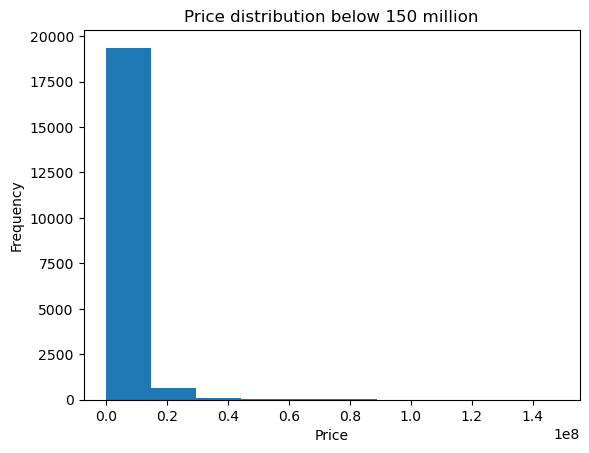

In [55]:
price_data['last_price'].plot(kind='hist')
plt.title('Price distribution below 150 million')
plt.xlabel('Price')
plt.ylabel('Frequency')

Now it is clear that it is possible to cut it further to 60,000,000Сейчас видно, что урезать можно еще до 60000000

In [56]:
price_data=data.loc[data['last_price']<60000000]

Text(0, 0.5, 'Frequency')

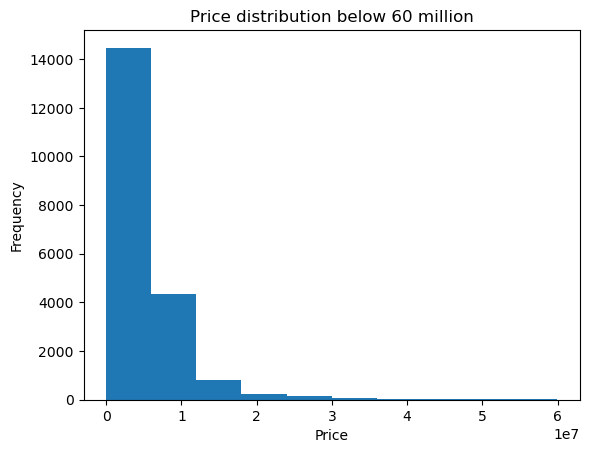

In [57]:
price_data['last_price'].plot(kind='hist')
plt.title('Price distribution below 60 million')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [58]:
price_data=data.loc[data['last_price']<45000000]

Text(0, 0.5, 'Price')

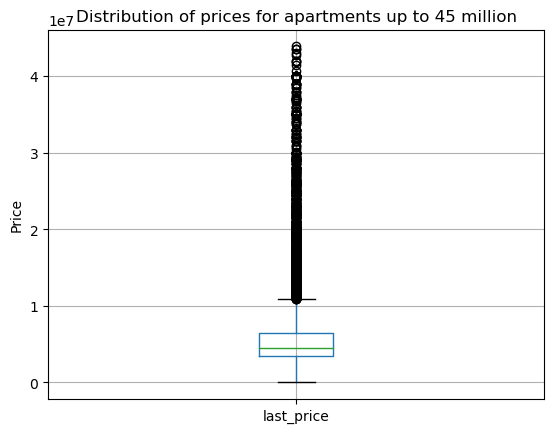

In [59]:
price_data.boxplot(column=['last_price'])
plt.title('Distribution of prices for apartments up to 45 million')
plt.ylabel('Price')


Text(0, 0.5, 'Price')

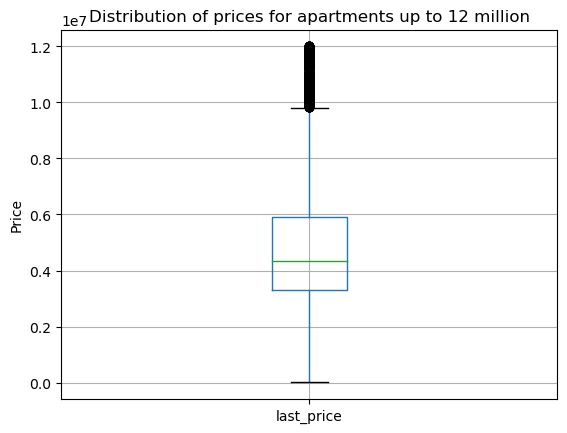

In [60]:
price_data=data.loc[data['last_price']<12000000]
price_data.boxplot(column=['last_price'])
plt.title('Distribution of prices for apartments up to 12 million')
plt.ylabel('Price')


The graph shows that the majority of apartments cost up to 10 million. The median is approximately 4.5 million

In [61]:
good_data = data.loc[data['last_price']<10000000]

Text(0, 0.5, 'Frequency')

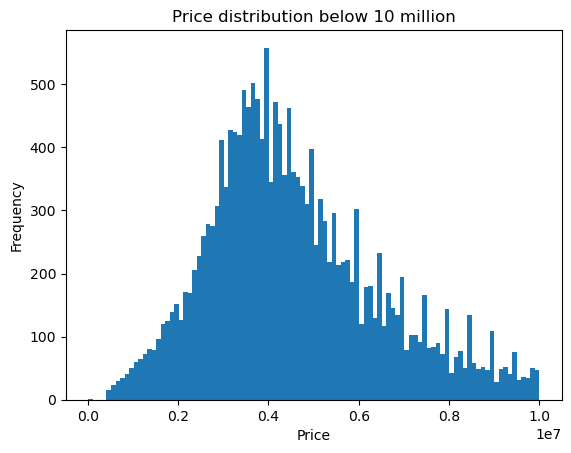

In [62]:
good_data['last_price'].plot(bins=100, kind='hist')
plt.title('Price distribution below 10 million')
plt.xlabel('Price')
plt.ylabel('Frequency')

Outliers and anomalies have been removed. The next parameter is the total area

Text(0, 0.5, 'Frequency')

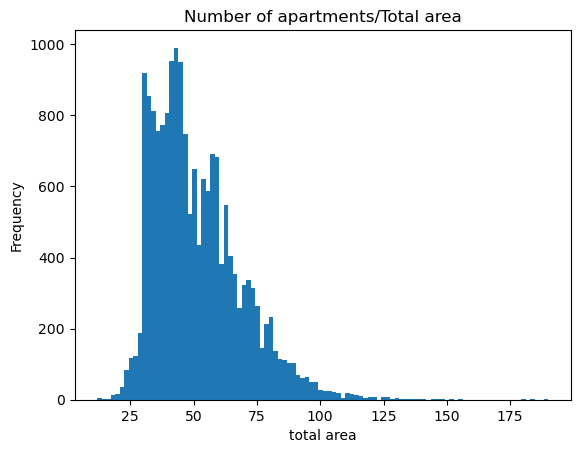

In [63]:
good_data['total_area'].plot(bins=100,kind='hist')
plt.title('Number of apartments/Total area')
plt.xlabel('total area')
plt.ylabel('Frequency')

In [64]:
good_data.loc[good_data['total_area']<150].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18213 entries, 1 to 23695
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18213 non-null  int64         
 1   last_price            18213 non-null  int32         
 2   total_area            18213 non-null  float64       
 3   first_day_exposition  18213 non-null  datetime64[ns]
 4   rooms                 18213 non-null  int64         
 5   ceiling_height        18213 non-null  float64       
 6   floors_total          18213 non-null  int32         
 7   living_area           18213 non-null  float64       
 8   floor                 18213 non-null  int64         
 9   is_apartment          2197 non-null   object        
 10  studio                18213 non-null  bool          
 11  open_plan             18213 non-null  bool          
 12  kitchen_area          18213 non-null  float64       
 13  balcony         

In [65]:
good_data = good_data.loc[good_data['total_area']<150]

Text(0, 0.5, 'Frequency')

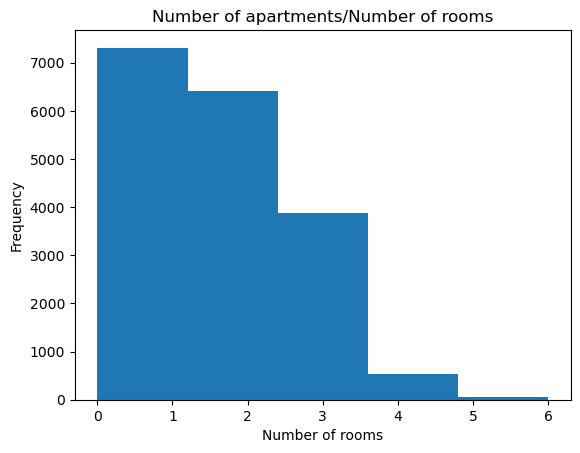

In [66]:
good_data['rooms'].plot(bins=5,kind='hist')
plt.title('Number of apartments/Number of rooms')
plt.xlabel('Number of rooms')
plt.ylabel('Frequency')

Consider emissions in ceiling heights

Text(0, 0.5, 'Frequency')

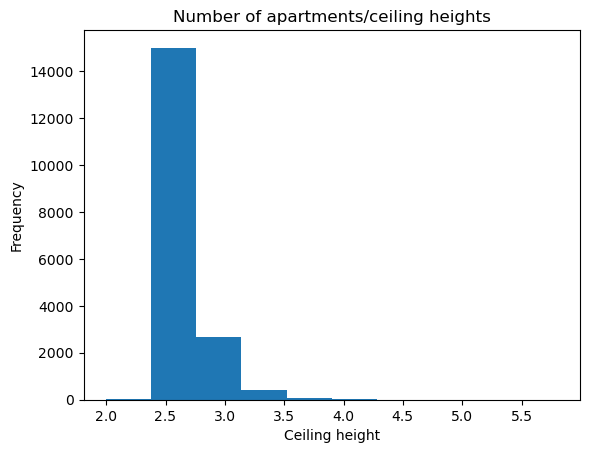

In [67]:
good_data['ceiling_height'].plot(bins=10,kind='hist')
plt.title('Number of apartments/ceiling heights')
plt.xlabel('Ceiling height')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

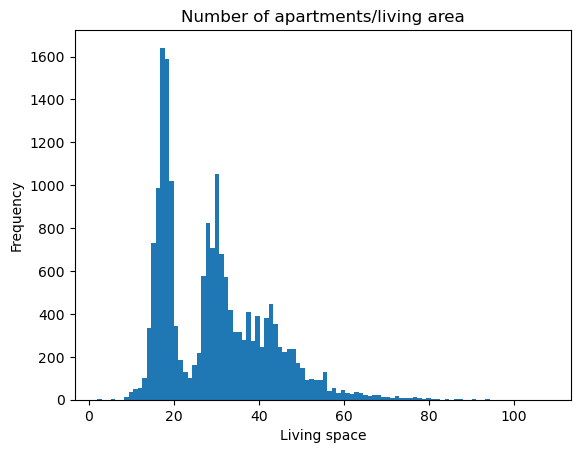

In [68]:
good_data['living_area'].plot(bins=100,kind='hist')
plt.title('Number of apartments/living area')
plt.xlabel('Living space')
plt.ylabel('Frequency')

two peaks are visible, but I can’t say that this is anomalous, because It is not surprising that some areas are much more popular.

Text(0, 0.5, 'Frequency')

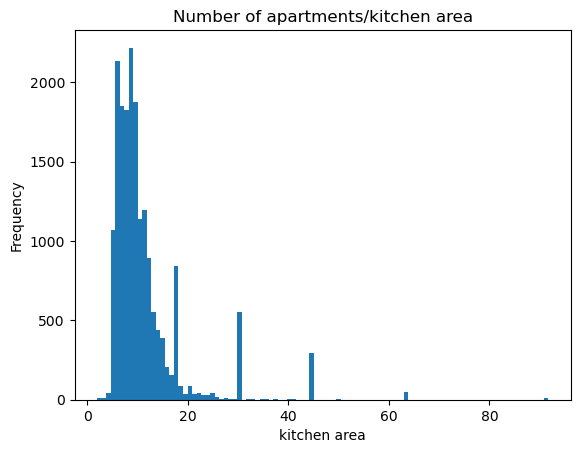

In [69]:
good_data['kitchen_area'].plot(bins=100,kind='hist')
plt.title('Number of apartments/kitchen area')
plt.xlabel('kitchen area')
plt.ylabel('Frequency')

Text(0, 0.5, 'kitchen area')

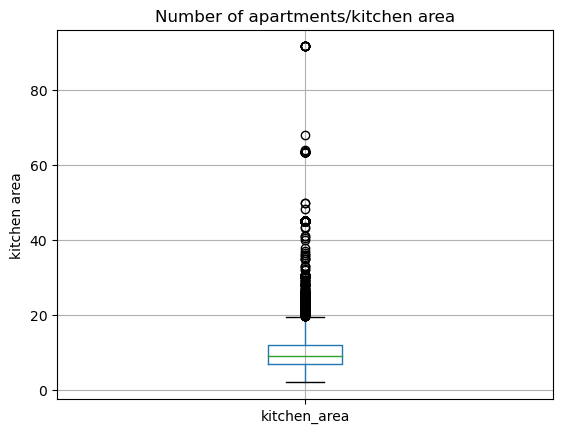

In [70]:
good_data.boxplot(column=['kitchen_area'])
plt.title('Number of apartments/kitchen area')
plt.ylabel('kitchen area')

In [71]:
good_data = good_data.loc[data['kitchen_area']<20]

removed all emissions above 20

Text(0, 0.5, 'Frequency')

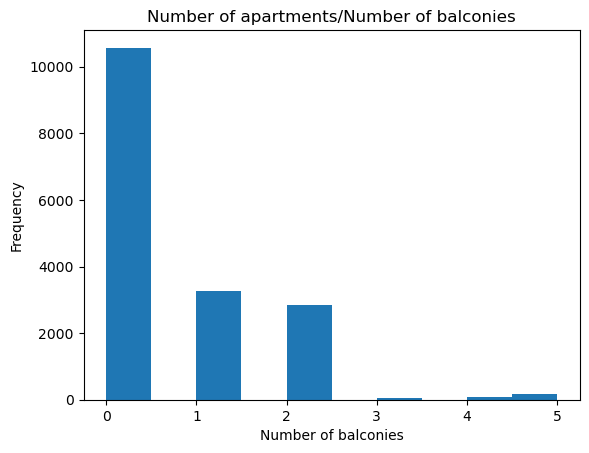

In [72]:
good_data['balcony'].plot(kind='hist',bins=10)
plt.title('Number of apartments/Number of balconies')
plt.xlabel('Number of balconies')
plt.ylabel('Frequency')

judging by the graphs in point 1, there are no obvious anomalies in the remaining data.

just in case, update the dataframe indexes

In [73]:
good_data.reset_index(drop=True, inplace=True)

In [74]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16972 entries, 0 to 16971
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          16972 non-null  int64         
 1   last_price            16972 non-null  int32         
 2   total_area            16972 non-null  float64       
 3   first_day_exposition  16972 non-null  datetime64[ns]
 4   rooms                 16972 non-null  int64         
 5   ceiling_height        16972 non-null  float64       
 6   floors_total          16972 non-null  int32         
 7   living_area           16972 non-null  float64       
 8   floor                 16972 non-null  int64         
 9   is_apartment          2095 non-null   object        
 10  studio                16972 non-null  bool          
 11  open_plan             16972 non-null  bool          
 12  kitchen_area          16972 non-null  float64       
 13  balcony         

In [75]:
good_data.duplicated().sum()

0

There are no obvious duplicates.

After working with gaps and removing outliers, approximately 80% of the original data remained. We can say that the quality of the source data is not the best

## 3.Adding new data

add a column with the price of 1 sq.m.

In [76]:
good_data['one_sm_price'] = good_data.last_price/good_data.total_area

Column with day of week of publication

In [77]:
good_data['weekday'] = good_data['first_day_exposition'].dt.weekday
#let's check that everything worked
print (good_data['weekday'].value_counts())

3    3089
1    2998
4    2949
2    2819
0    2558
5    1369
6    1190
Name: weekday, dtype: int64


In [78]:
#create a column with the month the publication appeared
good_data['month_publication'] = pd.DatetimeIndex(good_data['first_day_exposition']).month
print(good_data['month_publication'].head(3))

0    12
1     8
2     9
Name: month_publication, dtype: int64


In [79]:
#create a column with the year the publication appeared
good_data['year_publication'] = pd.DatetimeIndex(good_data['first_day_exposition']).year
print(good_data['year_publication'].head(3))

0    2018
1    2015
2    2018
Name: year_publication, dtype: int64


In [80]:
#create a column with the apartment floor type values ​​- “first”, “last”, “other”
def floor_type (name):
    if name['floor']==1:
        return 'first'
    elif name['floor'] == name ['floors_total']:
        return 'last'
    else:
        return 'another'
good_data['floor_type'] = good_data.apply(floor_type, axis=1)
print(good_data['floor_type'])
        
    

0          first
1        another
2        another
3        another
4        another
          ...   
16967    another
16968    another
16969    another
16970    another
16971    another
Name: floor_type, Length: 16972, dtype: object


In [81]:
#кcolumn with the distance to the city center in kilometers (convert from m to km, rounded to whole values).
good_data['km_to_center'] = good_data['cityCenters_nearest']/1000
good_data['km_to_center'] =good_data['km_to_center'].round(0) 

In [82]:
good_data['km_to_center']

0        19.0
1        14.0
2         NaN
3        19.0
4         NaN
         ... 
16967     6.0
16968     4.0
16969     NaN
16970    34.0
16971     NaN
Name: km_to_center, Length: 16972, dtype: float64

### 4. Exploratory data analysis

In [83]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16972 entries, 0 to 16971
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          16972 non-null  int64         
 1   last_price            16972 non-null  int32         
 2   total_area            16972 non-null  float64       
 3   first_day_exposition  16972 non-null  datetime64[ns]
 4   rooms                 16972 non-null  int64         
 5   ceiling_height        16972 non-null  float64       
 6   floors_total          16972 non-null  int32         
 7   living_area           16972 non-null  float64       
 8   floor                 16972 non-null  int64         
 9   is_apartment          2095 non-null   object        
 10  studio                16972 non-null  bool          
 11  open_plan             16972 non-null  bool          
 12  kitchen_area          16972 non-null  float64       
 13  balcony         

In [84]:
good_data['total_area'].describe()

count    16972.000000
mean        50.735064
std         17.036956
min         12.000000
25%         37.700000
50%         46.200000
75%         60.400000
max        147.800000
Name: total_area, dtype: float64

Text(0, 0.5, 'Frequency')

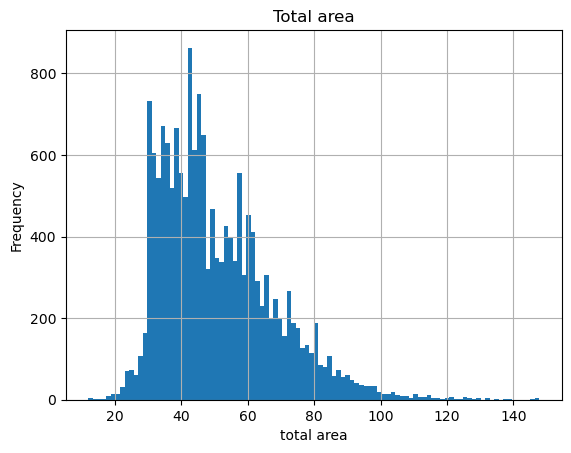

In [85]:
good_data['total_area'].hist(bins=100)
plt.title('Total area')
plt.xlabel('total area')
plt.ylabel('Frequency')

Most apartments on the market have a total area of ​​about 45-50 sq.m. We draw this conclusion from the fact that the mean and median are 46.2 and 50.7, respectively. There are two peaks on the graph between 30, 50, 60 sq.m. - the most popular quadrature on the market. There will most likely be a close relationship with the number of rooms, living area and kitchen area. But how quickly they sell still needs to be assessed. The larger the square footage, the fewer apartments on the market. Those. large apartments are a rarer phenomenon in the market of St. Petersburg and the region

count    16972.000000
mean        28.992439
std         12.484804
min          2.000000
25%         18.000000
50%         28.000000
75%         37.000000
max        108.000000
Name: living_area, dtype: float64

Text(0, 0.5, 'Frequency')

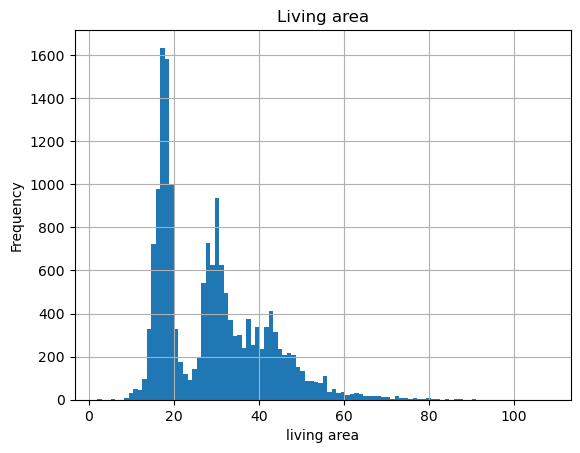

In [86]:
display(good_data['living_area'].describe())
good_data['living_area'].hist(bins=100)
plt.title('Living area')
plt.xlabel('living area')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

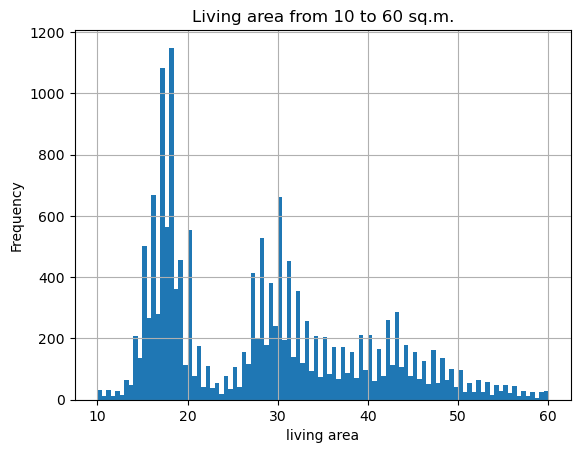

In [87]:
good_data['living_area'].hist(bins=100, range=[10, 60])
plt.title('Living area from 10 to 60 sq.m.')
plt.xlabel('living area')
plt.ylabel('Frequency')

because the residential area is always smaller than the total area, the maximum value here is less than in the total area and the schedule is more extended. There are also 3 peaks corresponding to 3 peaks on the total area graph. Most apartments with a living area are about 15-19 sq.m., in second place are 30 sq.m., and a little less about 42 sq.m. Again, the more sq.m., the fewer similar apartments are found on the market

count    16972.000000
mean         9.565913
std          3.337672
min          2.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         19.940000
Name: kitchen_area, dtype: float64

Text(0, 0.5, 'Frequency')

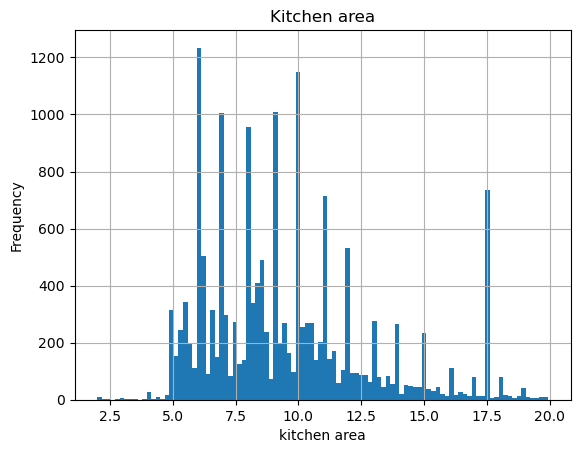

In [88]:
display(good_data['kitchen_area'].describe())
good_data['kitchen_area'].hist(bins=100)
plt.title('Kitchen area')
plt.xlabel('kitchen area')
plt.ylabel('Frequency')

Most kitchens in apartments are small, about 10 sq.m. The outliers in the graph indicate that kitchens, even in large apartments, are made more or less the same size, most likely corresponding to the size of the apartment.

count    1.697200e+04
mean     4.537425e+06
std      1.866595e+06
min      4.400000e+05
25%      3.250000e+06
50%      4.200000e+06
75%      5.600000e+06
max      9.999999e+06
Name: last_price, dtype: float64

Text(0, 0.5, 'Frequency')

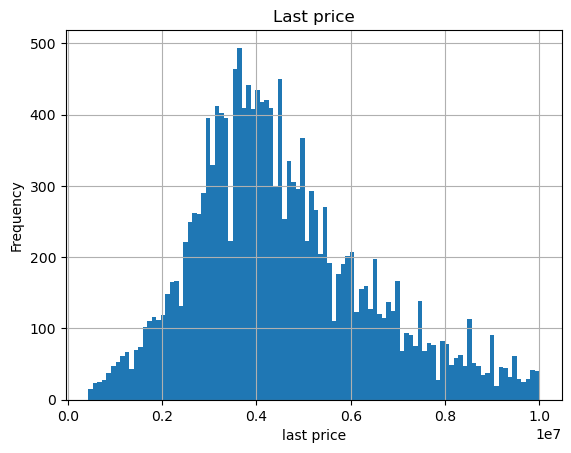

In [89]:
display(good_data['last_price'].describe())
good_data['last_price'].hist(bins=100)
plt.title('Last price')
plt.xlabel('last price')
plt.ylabel('Frequency')

Knowing the previous graphs, we can make an approximate conclusion that on the market there is an apartment of approximately 45- 50 sq.m. will cost about 4 ml.r. The larger the apartment, the more expensive it is. The most expensive is about 10 million, the cheapest is 440 thousand rubles

count    16972.000000
mean         1.840090
std          0.878648
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: rooms, dtype: float64

Text(0, 0.5, 'Frequency')

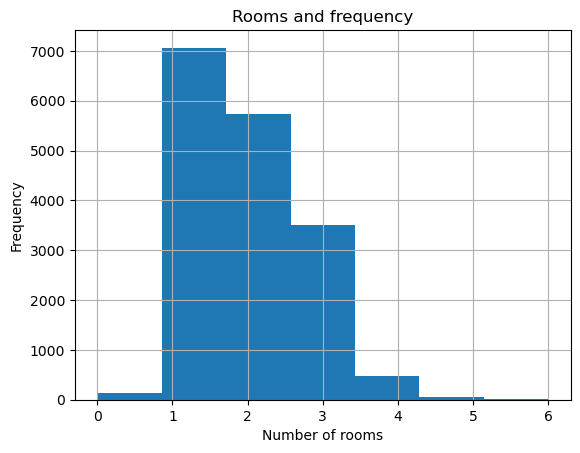

In [90]:
display(good_data['rooms'].describe())
good_data['rooms'].hist(bins=7)
plt.title('Rooms and frequency')
plt.xlabel('Number of rooms')
plt.ylabel('Frequency')


The most popular on the market are 1-room apartments. Most likely, this number also includes studios, because... These are quite popular apartments, and on the histogram we see that there are very few of them. 2-room apartments are quite a bit behind. 3-room apartments are already significantly smaller, and further, the more rooms, the fewer such apartments.

count    16972.000000
mean         2.658513
std          0.183573
min          2.000000
25%          2.525000
50%          2.600000
75%          2.700000
max          5.300000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'Frequency')

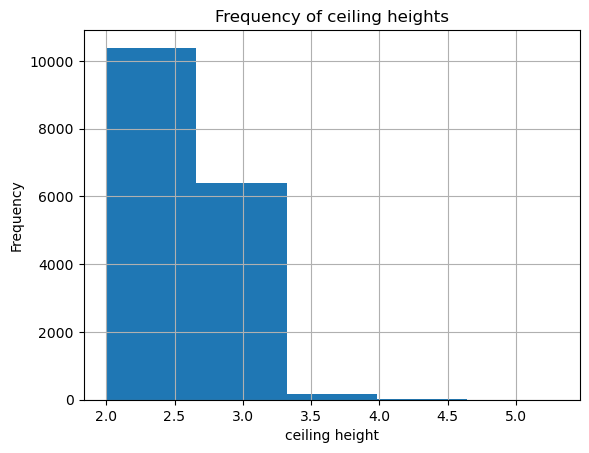

In [91]:
display(good_data['ceiling_height'].describe())
good_data['ceiling_height'].hist(bins=5)
plt.title('Frequency of ceiling heights')
plt.xlabel ('ceiling height')
plt.ylabel ('Frequency')


Most apartments have standard ceilings, 2.65. There are a large number with low ceilings, but stability (Stalin-era, multi-level) is quite rare.

count    16972.000000
mean         5.976019
std          4.929443
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Text(0, 0.5, 'Frequency')

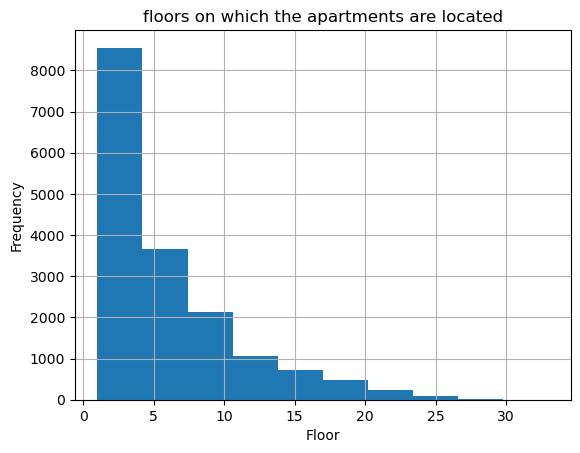

In [92]:
display(good_data['floor'].describe())
good_data['floor'].hist(bins=10)
plt.title ('floors on which the apartments are located')
plt.xlabel('Floor')
plt.ylabel('Frequency')

The majority of apartments for sale are on low floors, from 1 to 5. The higher the floor of the apartment, the fewer similar apartments are on sale.

count       16972
unique          3
top       another
freq        12540
Name: floor_type, dtype: object

Text(0, 0.5, 'Frequency')

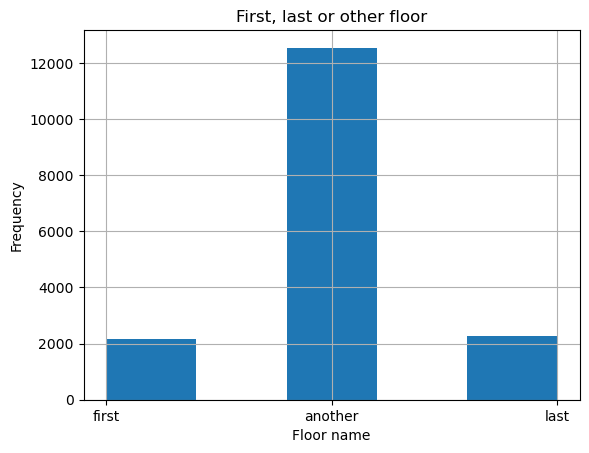

In [93]:
display(good_data['floor_type'].describe())
good_data['floor_type'].hist(bins=5)
plt.title('First, last or other floor')
plt.xlabel ('Floor name')
plt.ylabel('Frequency')

the number of apartments for sale on the first and last floors is approximately the same. The bulk of apartments are located somewhere between

count    16972.000000
mean        10.944791
std          6.646974
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Text(0, 0.5, 'Frequency')

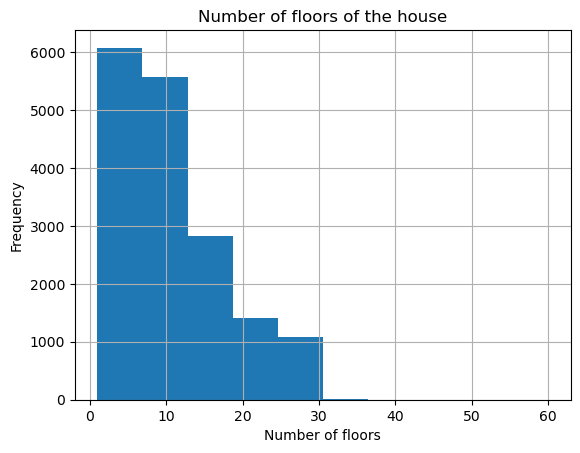

In [94]:
display(good_data['floors_total'].describe())
good_data['floors_total'].hist(bins=10)
plt.title('Number of floors of the house')
plt.xlabel ('Number of floors')
plt.ylabel('Frequency')

Most apartments are located in 9-10 storey buildings. There are very few houses above 30 floors

count    12794.000000
mean     15272.562764
std       8475.301362
min        208.000000
25%      10935.000000
50%      13802.000000
75%      16804.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Text(0, 0.5, 'Frequency')

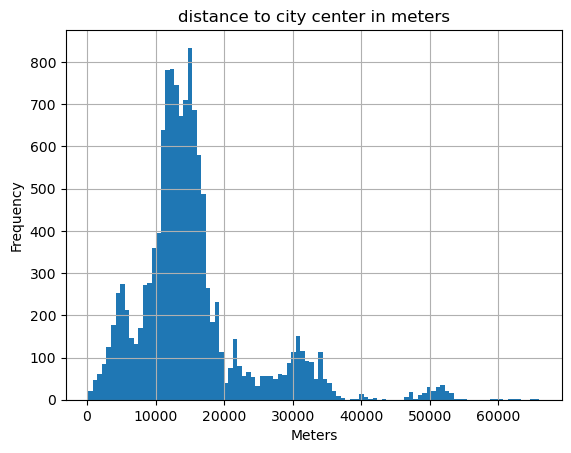

In [95]:
display(good_data['cityCenters_nearest'].describe())
good_data['cityCenters_nearest'].hist(bins=100)
plt.title ('distance to city center in meters')
plt.xlabel ('Meters')
plt.ylabel('Frequency')

On the chart we see 5 peaks. The bulk of the apartments are located approximately 15 km from the center. Considering that the diameter of the city is 32 km, we can conclude that apartments are mainly sold on the border of St. Petersburg and the Leningrad region. The second most popular apartments are located about 5 km from the center. Further peak at 21, 31 and about 50 km. Most likely, it is at this distance that the satellite cities are located, where apartments are sold.

count    12782.000000
mean     29006.642388
std      13120.963744
min          0.000000
25%      17863.000000
50%      27310.000000
75%      38111.500000
max      84869.000000
Name: airports_nearest, dtype: float64

Text(0, 0.5, 'Frequency')

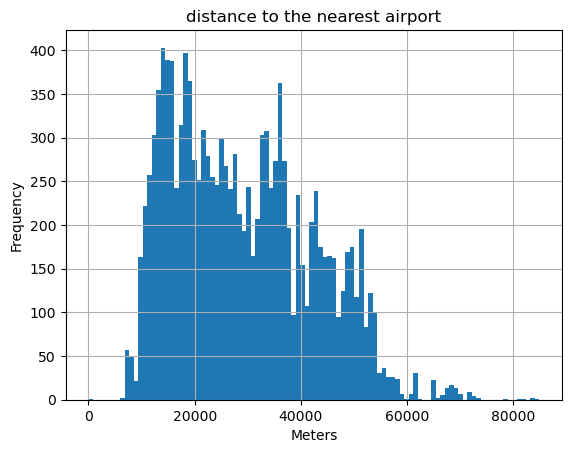

In [96]:
display(good_data['airports_nearest'].describe())
good_data['airports_nearest'].hist(bins=100)
plt.title('distance to the nearest airport')
plt.xlabel ('Meters')
plt.ylabel('Frequency')

count    5180.000000
mean      484.715251
std       324.810751
min         1.000000
25%       286.000000
50%       451.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Text(0, 0.5, 'Frequency')

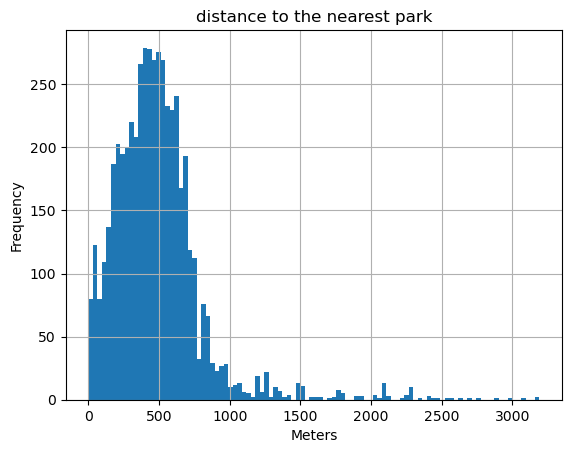

In [97]:
display(good_data['parks_nearest'].describe())
good_data['parks_nearest'].hist(bins=100)
plt.title('distance to the nearest park')
plt.xlabel ('Meters')
plt.ylabel('Frequency')

count    16972.000000
mean         2.573886
std          1.781910
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

Text(0, 0.5, 'Frequency')

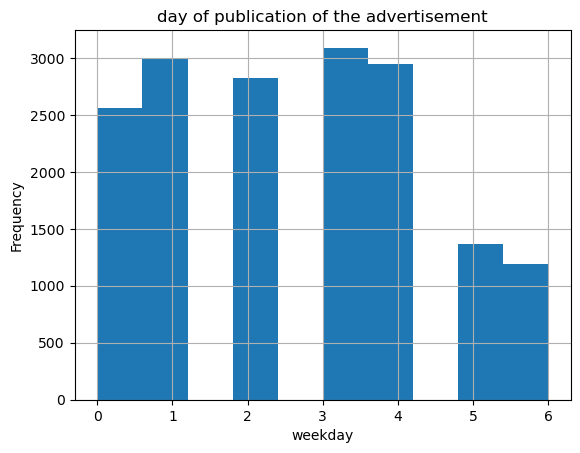

In [98]:
display(good_data['weekday'].describe())
good_data['weekday'].hist(bins=10)
plt.title('day of publication of the advertisement')
plt.xlabel ('weekday')
plt.ylabel('Frequency')

count    16972.000000
mean         6.593212
std          3.465968
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month_publication, dtype: float64

Text(0, 0.5, 'Frequency')

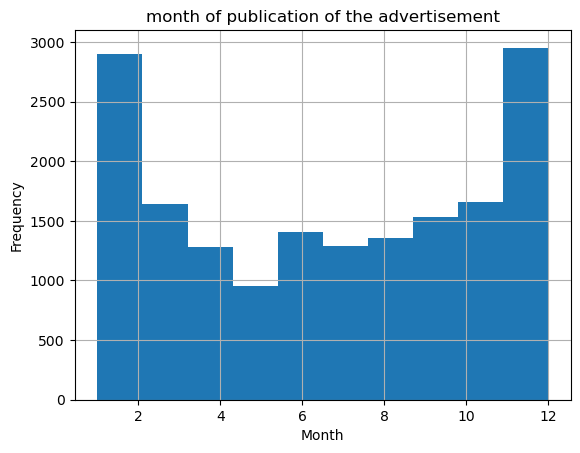

In [99]:
display(good_data['month_publication'].describe())
good_data['month_publication'].hist(bins=10)
plt.title('month of publication of the advertisement')
plt.xlabel ('Month')
plt.ylabel('Frequency')

Let's see how quickly apartments sold

In [100]:
good_data['days_exposition'].describe()

count    16972.000000
mean       172.498173
std        209.269449
min          1.000000
25%         42.000000
50%         93.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0, 0.5, 'Frequency')

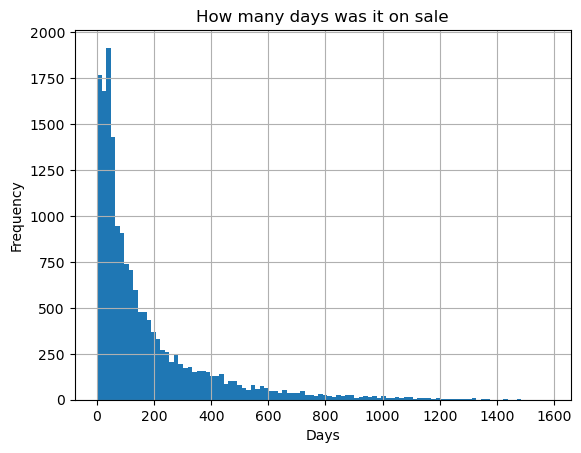

In [101]:
good_data['days_exposition'].hist(bins=100)
plt.title('How many days was it on sale')
plt.xlabel ('Days')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

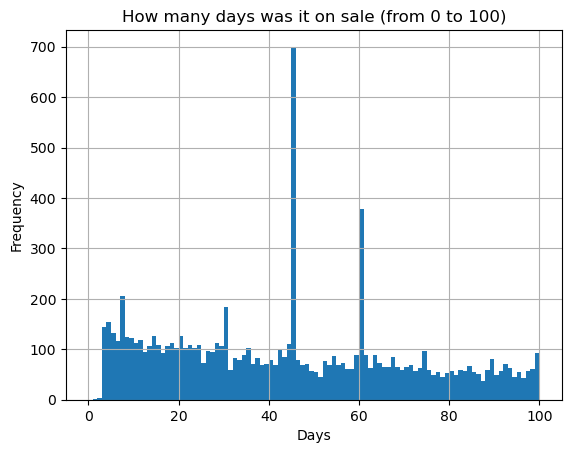

In [102]:
good_data['days_exposition'].hist(bins=100, range=[0,100])
plt.title('How many days was it on sale (from 0 to 100)')
plt.xlabel ('Days')
plt.ylabel('Frequency')

On average, apartments take about 3 months to sell. If the apartment was sold in 2 months, then this can be called a quick sale. And if the apartment has been visited for more than 8 months, then we can say that the sale has been delayed, because... 75% of apartments sell in less than 219 days.

if we reduce the boundaries to 100 days, we will identify sales peaks at approximately 43 and 60 days. Perhaps this is some kind of mistake. It is worth asking colleagues responsible for data collection

**Let's evaluate the relationship between the cost of an apartment and its parameters**

Text(0.5, 1.0, 'Relationship between total area and cost')

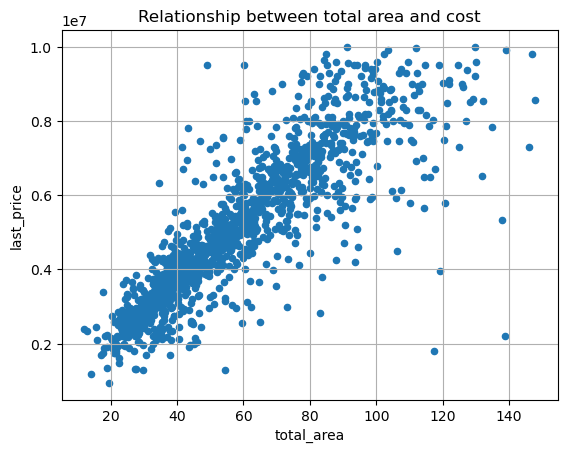

In [103]:
pivot_total_area = good_data.pivot_table(index='total_area',values='last_price').reset_index()
pivot_total_area.plot(x='total_area', y= 'last_price',kind='scatter', grid=True)
plt.title('Relationship between total area and cost')

Interim conclusion: the smaller the total area of ​​the apartment, the closer the prices for these apartments. As the total area increases, the cost of apartments begins to vary (i.e., most likely there is the influence of additional factors)Промежуточный вывод: чем меньше общая площадь квартиры, тем более одинаковые цены на эти квартиры. С ростом общей площади стоимость квартир начинает варьироваться (т.е. скорее всего есть влияние дополнительных факторов)

In [104]:
pivot_total_area['total_area'].corr(pivot_total_area['last_price'])

0.8548350437616414

The Pearson coefficient shows that the relationship between the two parameters is strong. The total area directly affects the final price.

Text(0.5, 1.0, 'Relationship between living area and cost')

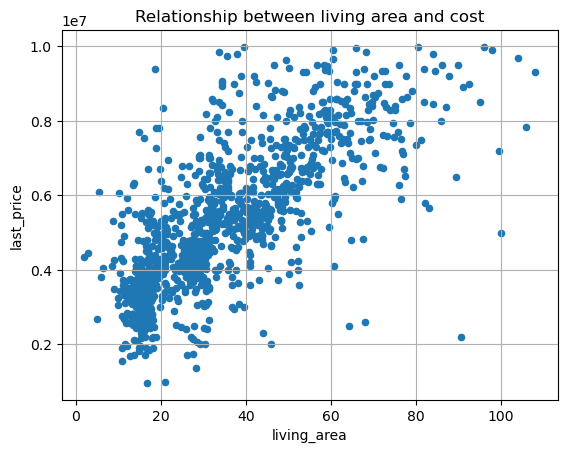

In [105]:
pivot_living_area = good_data.pivot_table(index='living_area',values='last_price').reset_index()
pivot_living_area.plot(x='living_area', y= 'last_price',kind='scatter', grid=True)
plt.title('Relationship between living area and cost')

In [106]:
pivot_living_area['living_area'].corr(pivot_living_area['last_price'])

0.7468799414804201

here the situation is approximately the same as in the total area, but the variations are a little greater. outliers from the total mass are visible, although they are isolated, but in general there are more of them than in the graph with the total area. And the correlation coefficient shows that the relationship is a little weaker. people are more willing to pay for common space; they are less concerned about living space.

Text(0.5, 1.0, 'Relationship between kitchen area and cost')

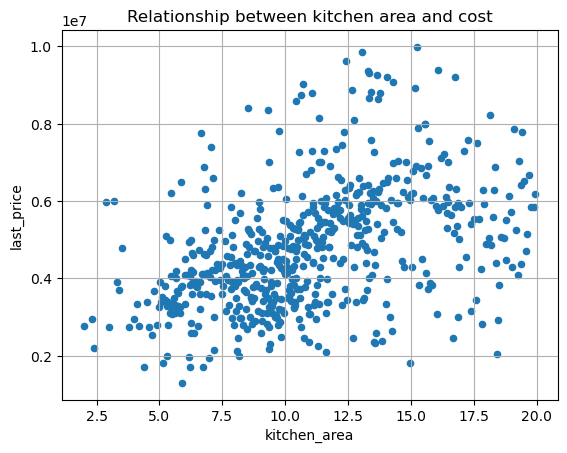

In [107]:
pivot_kitchen_area = good_data.pivot_table(index='kitchen_area',values='last_price').reset_index()
pivot_kitchen_area.plot(x='kitchen_area', y= 'last_price',kind='scatter', grid=True)
plt.title('Relationship between kitchen area and cost')

In [108]:
pivot_kitchen_area['kitchen_area'].corr(pivot_kitchen_area['last_price'])

0.44665747601376826

The spread in kitchen size and price is quite large, the correlation coefficient is rather weak. We conclude that the size of the kitchen has little effect on the final cost

Text(0.5, 1.0, 'Relationship between rooms number and cost')

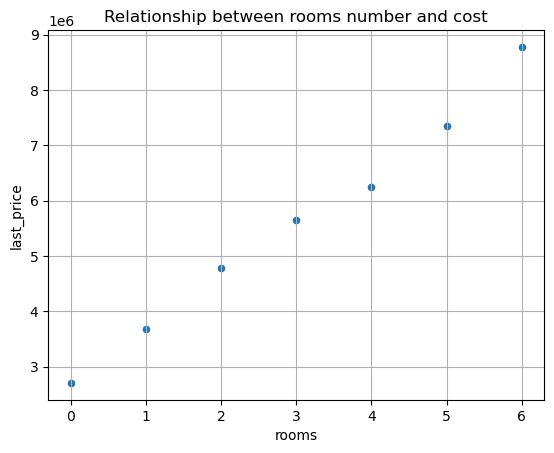

In [109]:
pivot_rooms = good_data.pivot_table(index='rooms',values='last_price').reset_index()
pivot_rooms.plot(x='rooms', y= 'last_price',kind='scatter', grid=True)
plt.title('Relationship between rooms number and cost')

In [110]:
pivot_rooms['rooms'].corr(pivot_rooms['last_price'])

0.9953380944740385

A clear relationship between the cost of an apartment and the number of rooms. the more rooms, the higher the cost. Expected

  floor_type    last_price
0    another  4.703333e+06
1      first  3.918614e+06
2       last  4.208623e+06


Text(0.5, 1.0, 'Relationship between floor and cost')

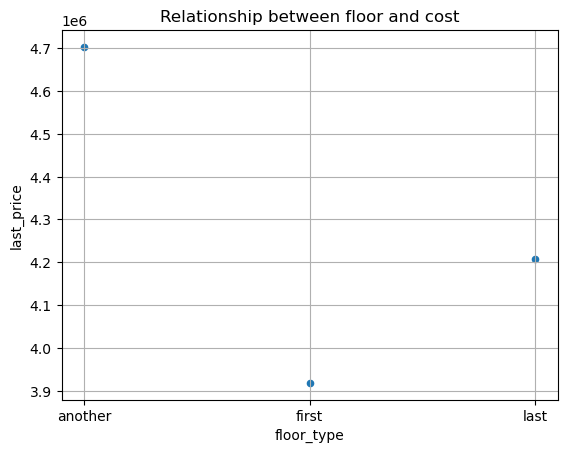

In [111]:
pivot_floor = good_data.pivot_table(index='floor_type',values='last_price').reset_index()
print(pivot_floor)
pivot_floor.plot(x='floor_type', y= 'last_price',kind='scatter', grid=True)
plt.title('Relationship between floor and cost')

The first floors are valued the least. Much cheaper. the most expensive ones are in between. But on the top floor, although more expensive than the first ones, they are inferior to those in between. Potential leaks, heat loss, etc. Expected

Text(0.5, 1.0, 'Prices by day of the week publication')

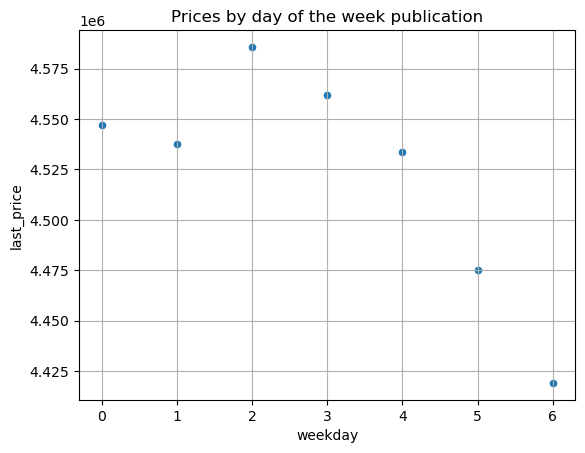

In [112]:
pivot_days = good_data.pivot_table(index='weekday',values='last_price').reset_index()
pivot_days.plot(x='weekday', y= 'last_price',kind='scatter', grid=True)
plt.title('Prices by day of the week publication')

In [113]:
pivot_days['weekday'].corr(pivot_days['last_price'])

-0.7591413146864211

The most expensive apartments are published on Thursday. And on Saturday they are the cheapest. Maybe because at this time owners publish advertisements who do not want to pay commissions to agencies? a negative coefficient tells us that the further away the days of the week go, the cheaper apartments are published.

Text(0.5, 1.0, 'Prices depending on the month of publication')

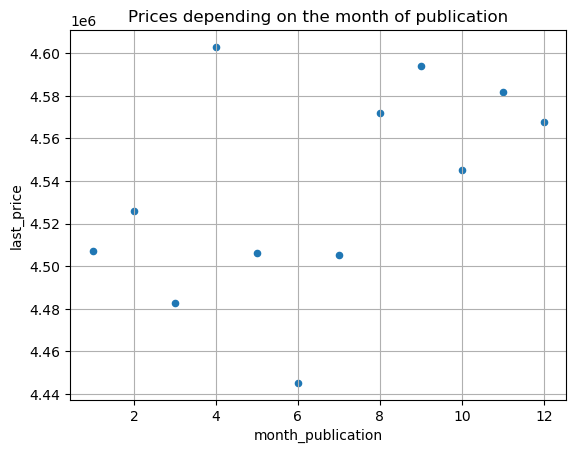

In [114]:
pivot_month = good_data.pivot_table(index='month_publication',values='last_price').reset_index()
pivot_month.plot(x='month_publication', y= 'last_price',kind='scatter', grid=True)
plt.title ('Prices depending on the month of publication')

In [115]:
pivot_month['month_publication'].corr(pivot_month['last_price'])

0.4692901291535159

The most “selling” months are April, August and September. But in March, July and October the price of apartments falls. It looks like these are seasonal fluctuations. The Pearson coefficient does not see a direct correlation, but we can draw similar conclusions from the graphs

Text(0.5, 1.0, 'Prices depending on the year of publication')

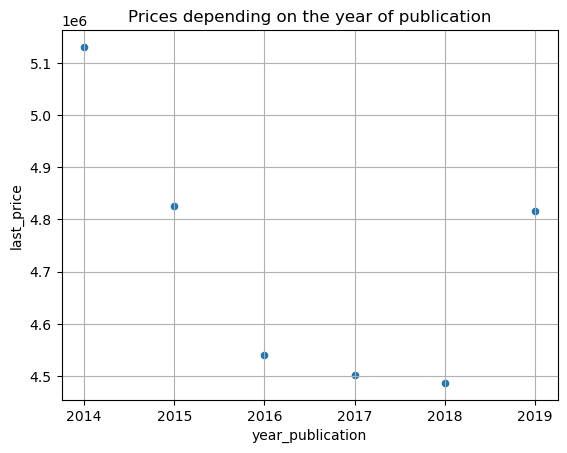

In [116]:
pivot_year = good_data.pivot_table(index='year_publication',values='last_price').reset_index()
pivot_year.plot(x='year_publication', y= 'last_price',kind='scatter', grid=True)
plt.title ('Prices depending on the year of publication')

Over the past 5 years, the cost of apartments has been falling. In 2014, apartments were more expensive than in 2019. This is an unexpected result. It's better to take a closer look at the year-by-year data

год 2014
       total_area    last_price
count   62.000000  6.200000e+01
mean    58.834032  5.044326e+06
std     19.758840  1.976962e+06
min     31.000000  1.200000e+06
25%     43.475000  3.500000e+06
50%     54.400000  4.822500e+06
75%     71.025000  6.200000e+06
max    125.000000  9.495000e+06


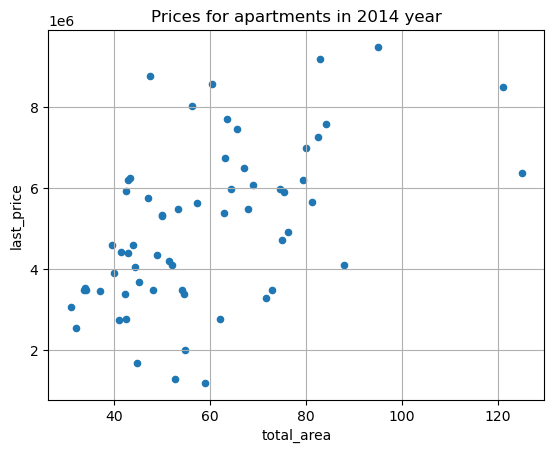

год 2015
       total_area    last_price
count  350.000000  3.500000e+02
mean    59.320057  5.190759e+06
std     22.567495  1.877587e+06
min     18.000000  1.550000e+06
25%     41.350000  3.699766e+06
50%     56.850000  4.910000e+06
75%     73.850000  6.328728e+06
max    147.000000  9.962480e+06


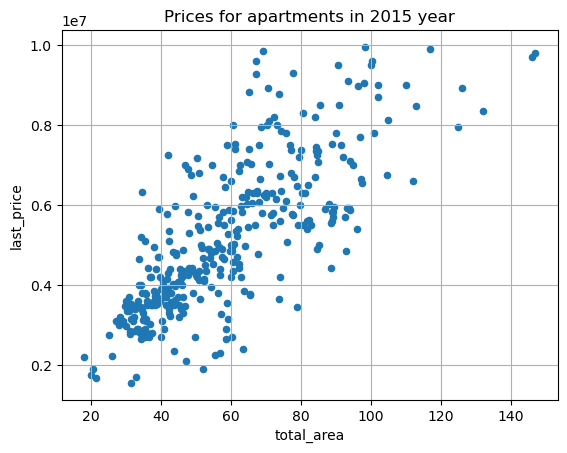

год 2016
       total_area    last_price
count  567.000000  5.670000e+02
mean    58.677725  4.980798e+06
std     23.569293  1.949950e+06
min     18.900000  8.000000e+05
25%     40.550000  3.521518e+06
50%     55.100000  4.516667e+06
75%     72.150000  6.300000e+06
max    147.800000  9.900000e+06


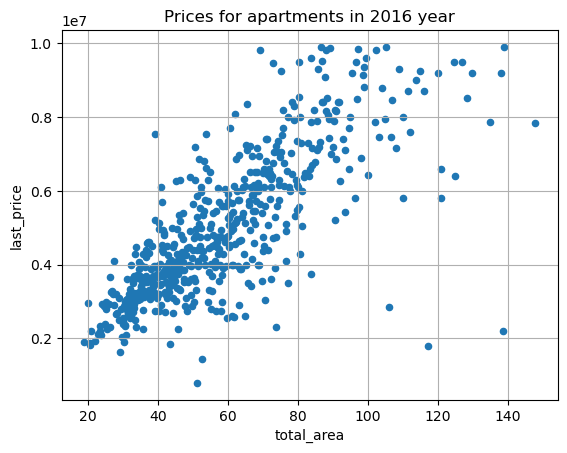

год 2017
       total_area    last_price
count  907.000000  9.070000e+02
mean    58.654553  5.057954e+06
std     23.607028  1.984934e+06
min     12.000000  7.700000e+05
25%     39.150000  3.582812e+06
50%     55.300000  4.695657e+06
75%     75.050000  6.485447e+06
max    147.800000  9.999000e+06


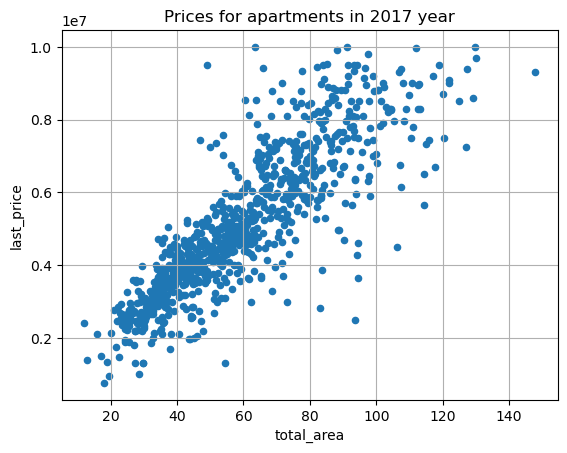

год 2018
       total_area    last_price
count  953.000000  9.530000e+02
mean    55.478625  4.965759e+06
std     22.310632  1.882500e+06
min     13.000000  1.050000e+06
25%     36.790000  3.488000e+06
50%     52.600000  4.630500e+06
75%     71.700000  6.140000e+06
max    138.000000  9.930000e+06


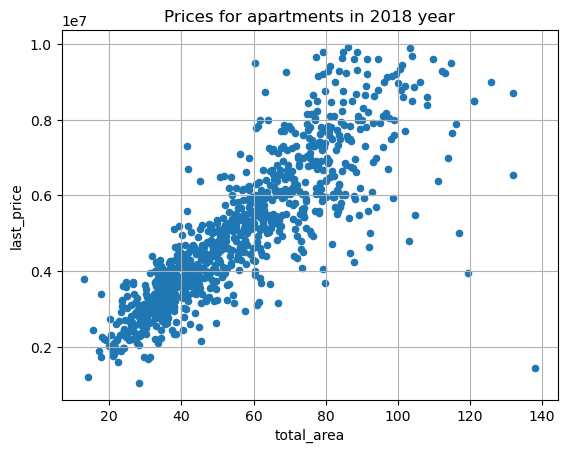

год 2019
       total_area    last_price
count  375.000000  3.750000e+02
mean    50.611893  5.036778e+06
std     18.133885  1.783113e+06
min     13.000000  5.300000e+05
25%     36.600000  3.798595e+06
50%     47.670000  4.796667e+06
75%     62.250000  6.244350e+06
max    146.000000  9.999999e+06


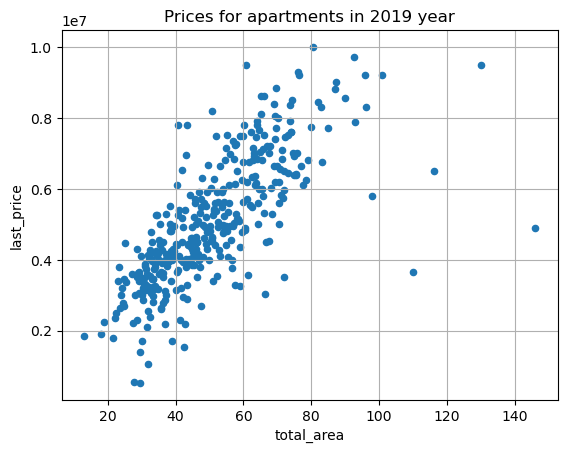

In [117]:
years = pivot_year['year_publication']
for year in years:
    print('год',year)
    pivot_oneyear = good_data.loc[good_data['year_publication'] == year].pivot_table(index='total_area',values='last_price').reset_index()
    print(pivot_oneyear.describe())
    pivot_oneyear.plot(x='total_area', y= 'last_price',kind='scatter', grid=True)
    plt.title(f'Prices for apartments in {year} year')
    plt.show()

Conclusion. It turns out that in 2014 there were too few apartments for sale, which is why the price has shot up so much compared to other years. And if you look at the median by area and price, it turns out that the median area has been decreasing over the years. but the price remains approximately the same. That is, on the contrary, apartment prices are rising.

***In total, we can say that the greatest influence on the price of an apartment is influenced by the square footage of the total area, living space, number of rooms, and location of the apartment; those located in the middle of an apartment building are more valued. The area of the kitchen affects the final price very little, practically not at all.
We can also conclude that the most expensive apartments are announced for sale from Monday to Thursday. And also in April, August or September. From 2014 to 2019, the number of apartments sold increased, and the median square footage fell. Those. The apartments sold have become smaller in size, but there are more of them overall.***

In [118]:
pivot_name = good_data.pivot_table(index='locality_name', values='one_sm_price', aggfunc=['median','count']).reset_index()
#pivot_name.columns = pivot_name.columns.map('_',join)
pivot_name.columns = pivot_name.columns.droplevel()
pivot_name.columns = ['name','price','count']
pivot_sort_name = pivot_name.sort_values(by=['count'],ascending=False)
print(pivot_sort_name.head(10))

                  name          price  count
32     Санкт-Петербург  100173.993421  10802
188     поселок Мурино   86378.737542    509
255     поселок Шушары   76584.507042    377
3           Всеволожск   65789.473684    306
13             Колпино   73913.043478    293
198  поселок Парголово   92097.069597    280
72     деревня Кудрово   92682.926829    261
31              Пушкин   96899.038462    258
6              Гатчина   67180.706522    256
4               Выборг   57432.432432    181


the most expensive price per square meter in St. Petersburg. But there are significantly more advertisements there, 2.5 times more compared to the next settlement.
Further, the most expensive settlements are Pushkin, the village of Kudrovo, the village of Pargolovo, and the village of Murino. But the villages of Shushary, Kolpino, Gatchina, Vsevolozhsk and Vyborg are already much cheaper in terms of cost per square meter.

***Calculation of the cost per km depending on the distance from the center***

In [119]:
#we get a cross-section of St. Petersburg
data_spb = good_data.query('locality_name=="Санкт-Петербург"')
#We group the dataframe by total price and 1 sq.m. depending on km from cent
pivot_km = data_spb.pivot_table(index='km_to_center', values=['last_price','one_sm_price'],aggfunc='mean' ).reset_index()

print(pivot_km)

    km_to_center    last_price   one_sm_price
0            0.0  6.998333e+06  117422.765402
1            1.0  7.276915e+06  116297.616558
2            2.0  7.204652e+06  109519.452085
3            3.0  6.513248e+06  105725.394674
4            4.0  6.878823e+06  112839.749247
5            5.0  6.868536e+06  119003.797957
6            6.0  6.469149e+06  118548.106464
7            7.0  6.054646e+06  113564.264104
8            8.0  5.910060e+06  113161.064848
9            9.0  5.147625e+06  104325.598657
10          10.0  5.020103e+06  106303.335872
11          11.0  5.001704e+06  102343.758771
12          12.0  5.029049e+06  104527.874515
13          13.0  5.196564e+06  104202.228090
14          14.0  5.043240e+06  102158.365564
15          15.0  4.995540e+06  100876.460954
16          16.0  4.817487e+06   97605.204313
17          17.0  4.650147e+06   94288.323587
18          18.0  4.445944e+06   95020.909798
19          19.0  4.670663e+06   96871.533290
20          20.0  5.030788e+06  10

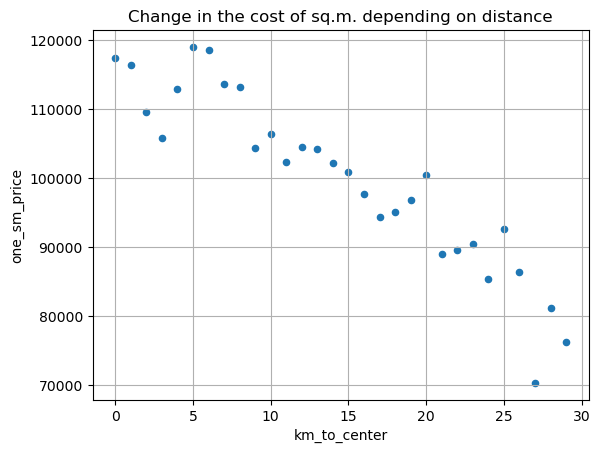

In [120]:
pivot_km.plot(x= 'km_to_center', y = 'one_sm_price', kind='scatter', grid=True)
plt.title('Change in the cost of sq.m. depending on distance');
plt.show()

It can be seen that the price per square meter falls depending on the distance from the center. At 7.19 km from the center and at 25 there is an increase in the cost of 1 sq.m., which indicates a more prestigious region or satellite city

### 5. Итоговый вывод

The following work was carried out in this project:

1. For data preparation - removal of gaps, logical errors and outliers. As a result, the amount of data suitable for analysis decreased by 20%
2. Exploratory data analysis.

As a result, we can say that the final price of the apartment is directly affected by the following data (i.e., the more, the more expensive):

1.Total area

2.Living area

3.Number of rooms

4. Number of floors of the apartment. Apartments on the first and last floors are cheaper than on the middle floors

5. Distance from the center. But, the price jumps a little at a distance of 7, 19 km and 25 km. from the center. Perhaps there is a more prestigious region or satellite city.

The kitchen area does not affect the cost of the apartment.

Depending on the day of the week: from Monday to Thursday the most expensive apartments are put up for sale. Peak: Thursday. But on weekends the price of apartments for sale is lower.

The most “selling” months are April, August and September. But in March, July and October the price of apartments falls. Looks like seasonal fluctuations.

The largest number of apartments on the market are from St. Petersburg (11,341). This is almost 2 times more than in the village of Murino (509) (second in the total number of apartments sold), and almost 4 or more times more than in other settlements.

Based on the speed of sales, we can say that if an apartment has been hanging for more than six months and is not for sale, then something is wrong with it, this sale has already taken too long. Most apartments are sold within 3 months.

You should also point out what appears to be a technical glitch when uploading data, because... all cartographic parameters were recorded with a large number of omissions.

I would also give a hint on how to correctly enter data on the number of rooms and living quarters for people who fill out the data manually, with a note not to forget to indicate whether the apartment is an apartment or not.